# <center style="color:#0178BD; font-family:cursive;"> *Table of Contents*</center>

1. [Introduction](#introduction)
  * [1.1 Context](#context)
  * [1.2 Data Dictionary](#data-dictionary)
 
  
2. [Preparation](#preparation)
  * 2.1 [Importing Packages](#importing-packages)
  * 2.2 [Understanding the Data](#understanding-data)
  * 2.3 [Cleaning the Data](#cleaning-data)
  
  
3. [Exploratory Data Analysis](#eda)
  * 3.1 [Univariate Analysis](#univariate-analysis)
        * 3.1.1 [Survived Count Plot](#survived-countplot)
        * 3.1.2 [Other Count Plots](#other-countplots)
        * 3.1.3 [Distribution Plots](#distribution-plots)
  * 3.2 [Multivariate Analysis](#multivariate-analysis)
        * 3.2.1 [Count Plots wrt Survived](#countplots-wrt-survived)
        * 3.2.2 [Count Plots wrt Others](#countplots-wrt-others)
        * 3.2.3 [Distribution wrt Survived](#distribution-wrt-survived)
        * 3.2.4 [Age and Fare Plots](#age-fare-plots)
        * 3.2.5 [3D Scatter Plot](#3d-scatterplot)
        
        
4. [Machine Learning](#machine-learning)
  * 4.1 [Data Preprocessing](#data-preprocessing)
  * 4.2 [Model building](#model-building)
        * 4.2.1 [Logistic Regression](#logistic-regression)
        * 4.2.2 [Decision Tree Classifier](#decision-tree)
        * 4.2.3 [Random Forest Classifier](#random-forest)
        * 4.2.4 [Gradient Boosting Classifier](#gradient-boost)
        * 4.2.5 [XG Boost Classifier](#xg-boost)
        
        
5. [Acknowledgements](#acknowledgements)

<a name="introduction"></a>
# <center style="color:#0178BD; font-family:cursive;"> *Introduction*</center>

<a name="context"></a>
<span style="font-size:18px; color:#368DC5; font-family:cursive;"> 1.1 Context</span>

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

<a name="data-dictionary"></a>
<span style="font-size:18px; color:#368DC5; font-family:cursive;"> 1.2 Data Dictionary</span>

`Age` : Age in Years

`Sex` : Sex

`Pclass` : Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)

`Embarked` : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

`SibSp` : Number of siblings / spouses aboard

`Parch` : Number of parents / children aboard

`Fare` : Passenger Fare

`Survived` : Survived = 1, Died = 0




<a name="preparation"></a>
# <center style="color:#0178BD; font-family:cursive;"> *Preparation*</center>

<a name="importing-packages"></a>
<span style="font-size:18px; color:#368DC5; font-family:cursive;"> 2.1 Importing Packages</span>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

<a name="understanding-data"></a>
<span style="font-size:18px; color:#368DC5; font-family:cursive;"> 2.2 Understanding the Data</span>

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a name="cleaning-data"></a>
<span style="font-size:18px; color:#368DC5; font-family:cursive;"> 2.3 Cleaning the Data</span>

In [9]:
## Dropping Unnecessary Columns
drop_cols = ['PassengerId','Cabin', 'Ticket', 'Name']
df.drop(drop_cols, axis = 1, inplace = True)

In [10]:
#### Handling Missing Values

## Fill missing AGE with Median
df['Age'].fillna(df['Age'].median(), inplace=True)

## Fill missing EMBARKED with Mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
df.drop(df[(df['Fare'] > 270)].index, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#368DC5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Since we have dropped the Unnecessary Columns and Filled the Missing Values ,we are now ready for Exploratory Data Analysis.
</p>
</div>

<a name="eda"></a>
# <center style="color:#0178BD; font-family:cursive;"> *Exploratory Data Analysis*</center>

In [14]:
## Constants
color_palettes = ['#e5e9ec', '#3c79e1', '#4c6b7d', '#1f2c2c', '#20ADD0', '#4A8670']
background_color = "#97CADB"
font = 'cursive'

<!-- <a name="univariate-analysis"></a>
<span style="font-size:18px; color:#368DC5; font-family:cursive;"> 3.1 Univariate Analysis</span>
 -->
<a name="univariate-analysis"></a>
## <center style="color:#0178BD; font-family:cursive;"> *3.1 Univariate Analysis*</center>

<a name="survived-countplot"></a>
<span style="font-size:16px; color:#368DC5; font-family:cursive;"> 3.1.1 Survived Count Plot</span>

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


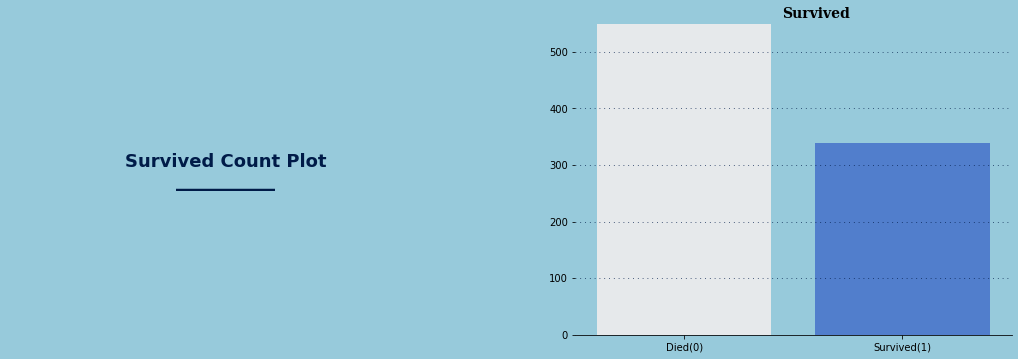

In [15]:
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)

# Title of the plot
ax0.text(0.5,0.5,"Survived Count Plot\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#001B48')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Survived Count
ax1.text(0.45,560,"Survived",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#001B48', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'Survived',palette = color_palettes)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Died(0)","Survived(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

<a name="other-countplots"></a>
<span style="font-size:16px; color:#368DC5; font-family:cursive;"> 3.1.2 Other Count Plots</span>

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


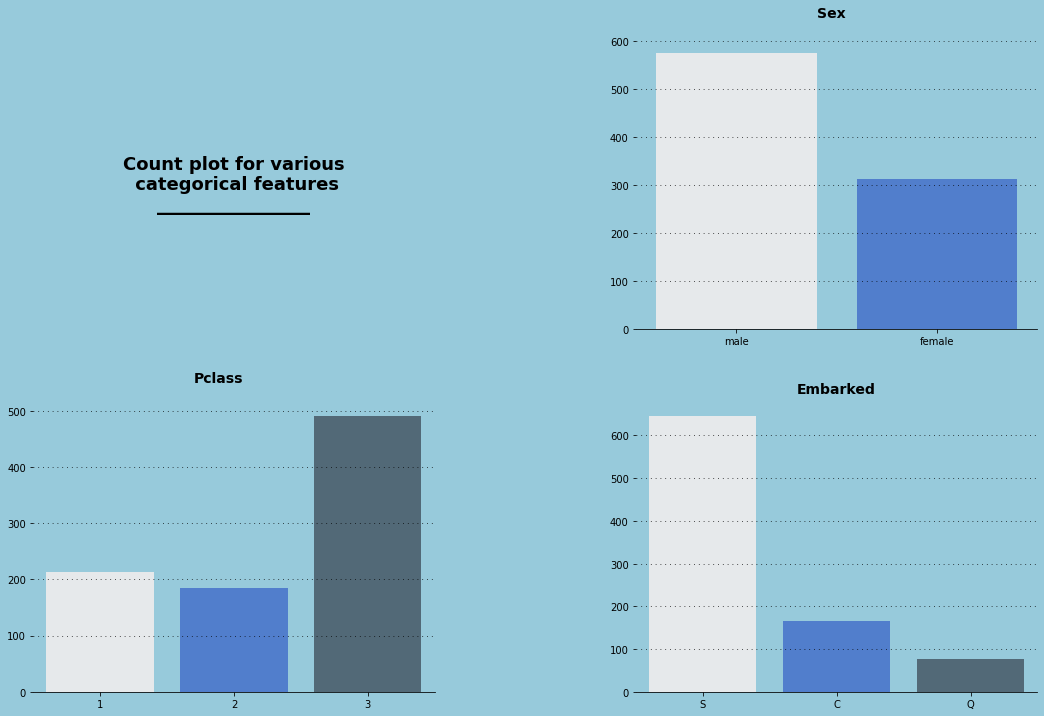

In [16]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='cursive',
         color="#000000")

# Sex Count
ax1.text(0.4, 650, 'Sex', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='Sex',palette=color_palettes)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Pclass Count
ax2.text(0.7, 550, 'Pclass', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='Pclass',palette=color_palettes)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Embarked Count
ax3.text(0.7, 700, 'Embarked', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='Embarked',palette=color_palettes)
ax3.set_xlabel("")
ax3.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

<a name="distribution-plots"></a>
<span style="font-size:16px; color:#368DC5; font-family:cursive;"> 3.1.3 Distribution Plots</span>

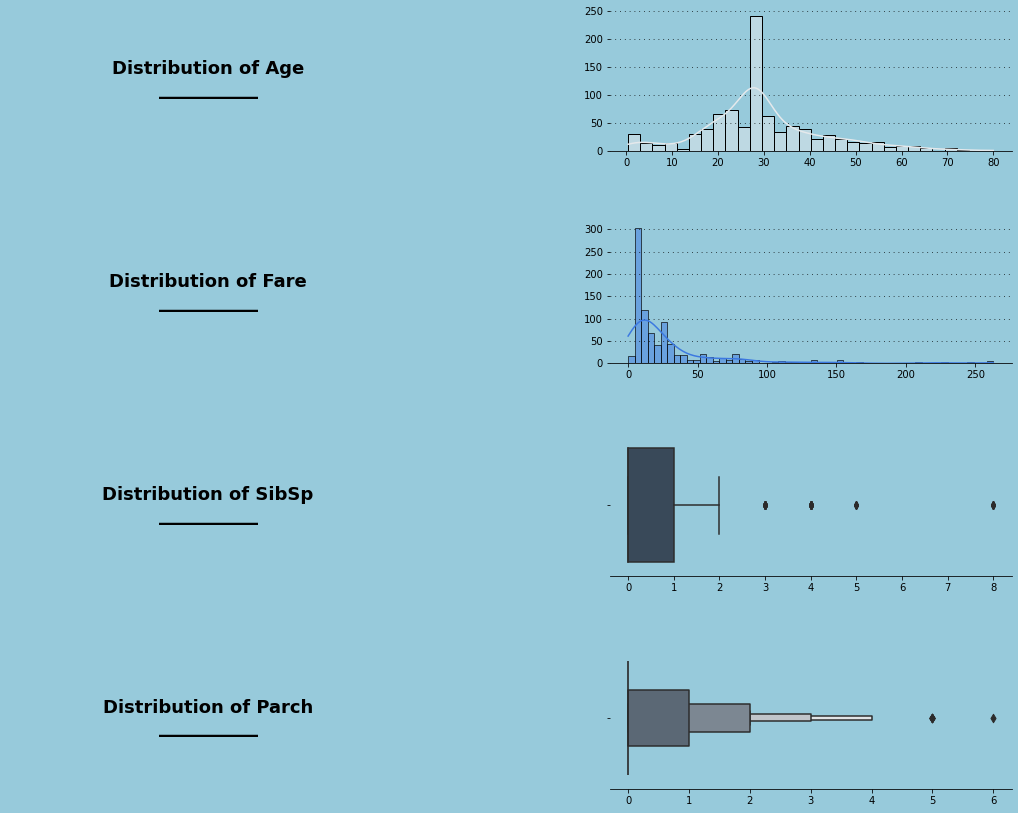

In [17]:
fig = plt.figure(figsize=(18, 30))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])


background_color = "#97CADB"
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of Age\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1,x=df['Age'],color="#e5e9ec",kde=True)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Fare title
ax2.text(0.5,0.5,"Distribution of Fare\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Fare
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3,x=df['Fare'],color="#3c79e1", kde=True)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SibSp title
ax4.text(0.5,0.5,"Distribution of SibSp\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# SibSp
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,x=df['SibSp'],color="#34495E")
ax5.set_xlabel("")
ax5.set_ylabel("")

# Parch title
ax6.text(0.5,0.5,"Distribution of Parch\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Parch
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,x=df['Parch'],color="#34495E")
ax7.set_xlabel("")
ax7.set_ylabel("")


for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)

<a name="multivariate-analysis"></a>
## <center style="color:#0178BD; font-family:cursive;"> *3.2 Multivariate Analysis*</center>

<a name="countplots-wrt-survived"></a>
<span style="font-size:16px; color:#368DC5; font-family:cursive;"> 3.2.1 Count Plots wrt Survived</span>

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


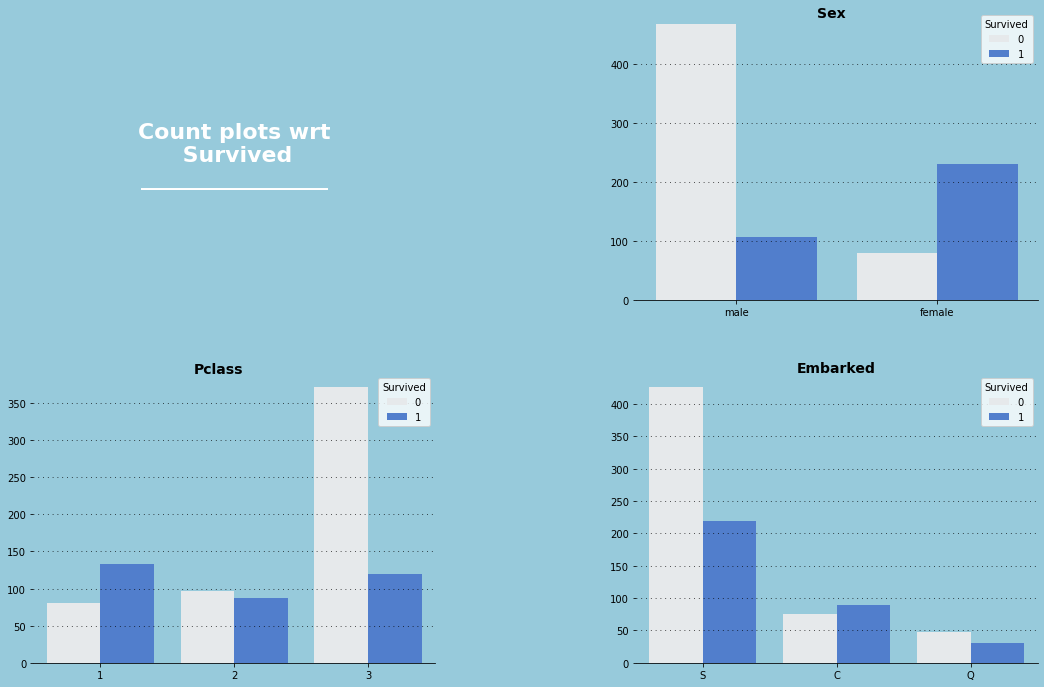

In [18]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plots wrt\n Survived\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22, fontweight='bold',
         fontfamily='cursive',
         color="#ffffff")

# Sex Count
ax1.text(0.4, 480, 'Sex', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='Sex', hue='Survived',palette=color_palettes)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Pclass Count
ax2.text(0.7, 390, 'Pclass', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='Pclass', hue='Survived', palette=color_palettes)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Embarked Count
ax3.text(0.7, 450, 'Embarked', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='Embarked', hue='Survived',palette=color_palettes)
ax3.set_xlabel("")
ax3.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

<a name="countplots-wrt-others"></a>
<span style="font-size:16px; color:#368DC5; font-family:cursive;"> 3.2.2 Count Plots wrt to Others</span>

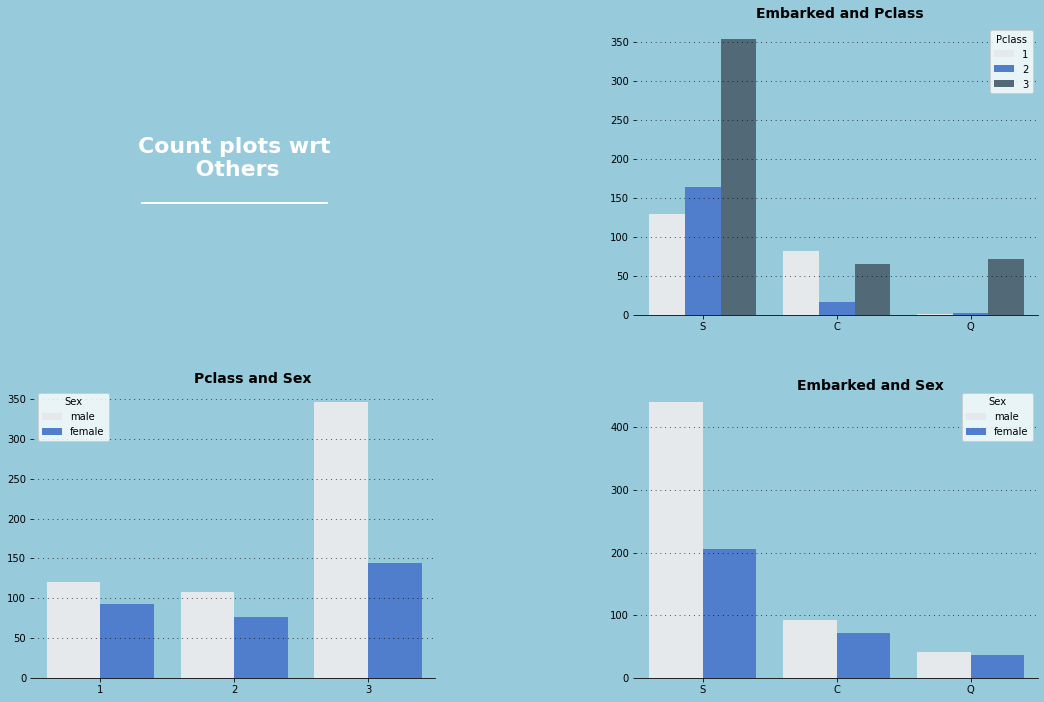

In [19]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plots wrt\n Others\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22, fontweight='bold',
         fontfamily='cursive',
         color="#ffffff")

# Embarked and Pclass
ax1.text(0.4, 380, 'Embarked and Pclass', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='Embarked', hue='Pclass',palette=color_palettes)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Pclass Count
ax2.text(0.7, 370, 'Pclass and Sex', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='Pclass', hue='Sex', palette=color_palettes)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Embarked Count
ax3.text(0.7, 460, 'Embarked and Sex', fontsize=14, fontweight='bold', fontfamily='cursive', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='Embarked', hue='Sex',palette=color_palettes)
ax3.set_xlabel("")
ax3.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

<a name="distribution-wrt-survived"></a>
<span style="font-size:16px; color:#368DC5; font-family:cursive;"> 3.2.3 Distribution wrt Survived</span>

findfont: Font family [''] not found. Falling back to DejaVu Sans.


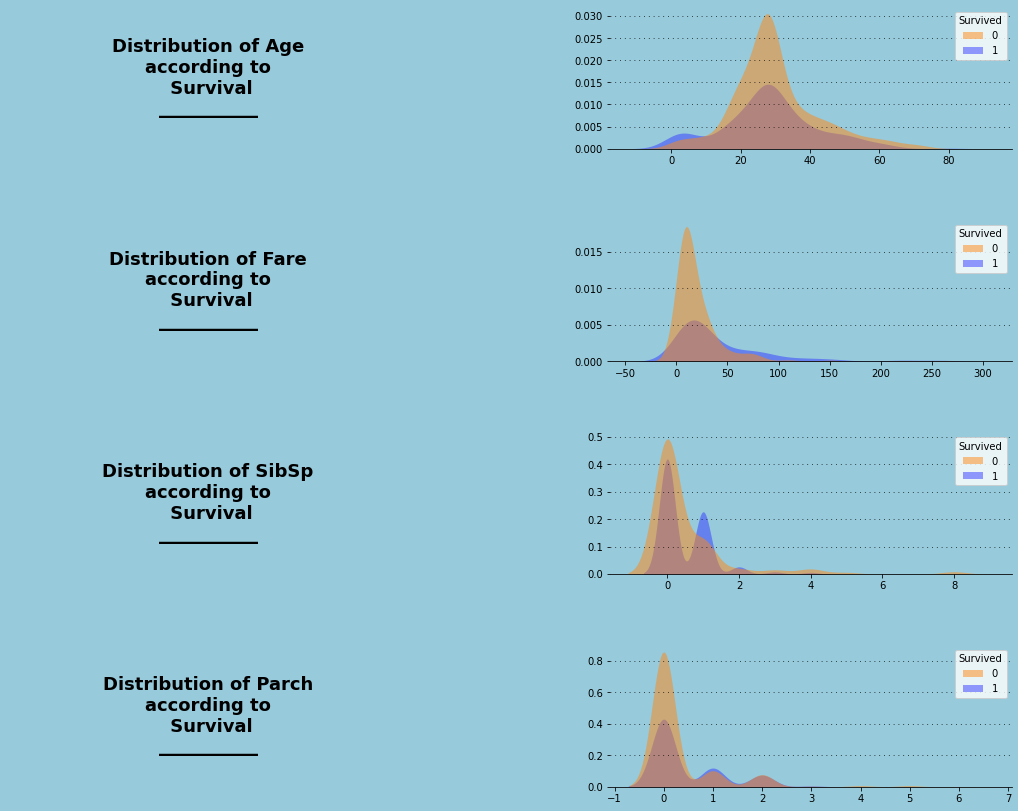

In [20]:
fig = plt.figure(figsize=(18, 30))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of Age\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='Age',hue="Survived", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Fare title
ax2.text(0.5,0.5,"Distribution of Fare\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Fare
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='Fare',hue="Survived", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SibSp title
ax4.text(0.5,0.5,"Distribution of SibSp\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# SibSp
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='SibSp',hue="Survived", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Parch title
ax6.text(0.5,0.5,"Distribution of Parch\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Parch
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='Parch',hue="Survived", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")


for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)

<a name="age-fare-plots"></a>
<span style="font-size:16px; color:#368DC5; font-family:cursive;"> 3.2.4 Age and Fare Plots </span>

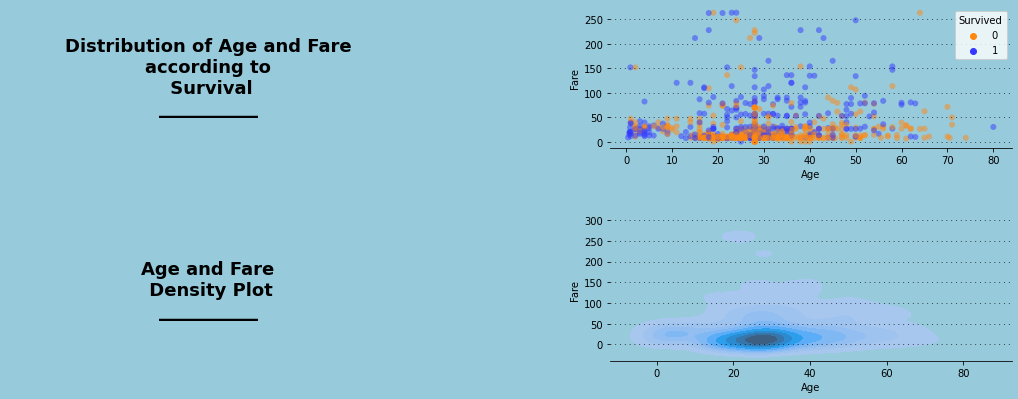

In [21]:
fig = plt.figure(figsize=(18, 30))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)


# ScatterPlot Title
ax0.text(0.5,0.5,"Distribution of Age and Fare\naccording to\n Survival\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age and Fare ScatterPlot
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax1, data=df, x='Age',y='Fare', hue="Survived",palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax1.set_xlabel("Age")
ax1.set_ylabel("Fare")


# Density Plot Title
ax2.text(0.5,0.5,"Age and Fare\n Density Plot\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='cursive',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Age and Fare Density Plot
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='Age',y="Fare", fill=True,palette=["#ff8811","#3339FF"])
ax3.set_xlabel("Age")
ax3.set_ylabel("Fare")


for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

<a name="3d-scatterplot"></a>
<span style="font-size:16px; color:#368DC5; font-family:cursive;"> 3.2.5  3D Scatter Plot</span>

In [22]:
fig = px.scatter_3d(df, x='Fare', y='Age', z='Sex',
              color='Survived',size_max=18,color_continuous_scale=['#e5e9ec', '#3c79e1'])
fig.update_layout({"template":"plotly_dark"})
fig.show()

For Males:
    
    * Most who `Survived` were below the age of 10.
    * Many `Survived` for whom `Fare` was 50$ - 150$.
    
For Females:
    
    * `Age` is not a very important factor here but `Fare` is
    * Almost all `Survived` for whom `Fare` was greater than 50$.

In [23]:
df_corr = df.corr().transpose()
df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334068,-0.067081,-0.033395,0.082157,0.261742
Pclass,-0.334068,1.000000,-0.338998,0.080937,0.018212,-0.604960
Age,-0.067081,-0.338998,1.000000,-0.232732,-0.172623,0.098801
SibSp,-0.033395,0.080937,-0.232732,1.000000,0.415141,0.211816
Parch,0.082157,0.018212,-0.172623,0.415141,1.000000,0.263910
Fare,0.261742,-0.604960,0.098801,0.211816,0.263910,1.000000


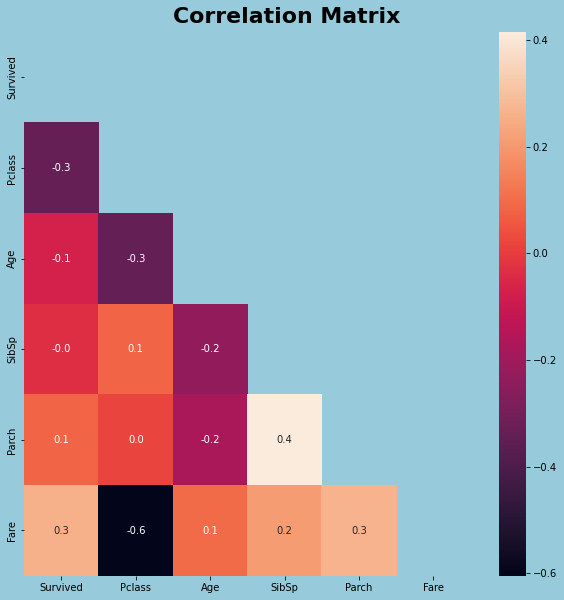

In [24]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

# df_corr = df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr().transpose()
mask = np.triu(np.ones_like(df_corr))
ax0.text(2,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='cursive', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True)
plt.show()

<a name="machine-learning"></a>
# <center style="color:#0178BD; font-family:cursive;"> *Machine Learning*</center>

<a name="data-preprocessing"></a>
## <center style="color:#0178BD; font-family:cursive;"> *4.1 Data Preprocessing*</center>

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [27]:
# df['Age'] = np.log(df['Age'])
# df['Fare'] = np.log(df['Fare'])

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [29]:
# df['Fare'] = df['Fare'].round(2)
# df['Age'] = df['Age'].round(2)

In [30]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [31]:
## Same stepsCategorical for test data
## Dropping Unnecessary Columns
drop_cols = ['PassengerId','Cabin', 'Ticket', 'Name']
test_df.drop(drop_cols, axis = 1, inplace = True)


#### Handling Missing Values

## Fill missing AGE and FARE with Median
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

## Fill missing EMBARKED with Mode
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [32]:
test_df['Sex'] = test_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_df['Embarked'] = test_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

# test_df['Age'] = np.log(test_df['Age'])
# test_df['Fare'] = np.log(test_df['Fare'])

In [33]:
test_df.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
298,1,1,30.0,0,0,45.5000,0
230,2,1,14.0,0,0,65.0000,0
26,1,0,22.0,0,1,61.9792,1
133,3,1,27.0,1,0,6.4375,1
69,1,0,60.0,1,4,263.0000,0


In [34]:
test_df.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

<a name="model-building"></a>
## <center style="color:#0178BD; font-family:cursive;"> *4.2 Model Building*</center>

In [35]:
## X and y

X = df.drop('Survived', axis = 1)
y = df['Survived']

In [36]:
## Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

<a name="logistic-regression"></a>
<span style="font-size:20px; color:#368DC5; font-family:cursive;"> 4.2.1 Logistic Regression </span>

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Accuracy score, Confusion Matrix and Classification Report of Logistic Regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classofocation Report : -\n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.7929577464788733
Test Accuracy of Logistic Regression is 0.8146067415730337
Confusion Matrix :- 
 [[86 18]
 [15 59]]
Classofocation Report : -
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       104
           1       0.77      0.80      0.78        74

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



<a name="decision-tree"></a>
<span style="font-size:20px; color:#368DC5; font-family:cursive;"> 4.2.2 Decision Tree Classifier </span>

In [38]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9830985915492958
Test Accuracy of Decision Tree Classifier is 0.7808988764044944 

Confusion Matrix :- 
[[84 20]
 [19 55]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       104
           1       0.73      0.74      0.74        74

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



<a name="random-forest"></a>
<span style="font-size:20px; color:#368DC5; font-family:cursive;"> 4.2.3 Random Forest Classifier</span>

In [39]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9816901408450704
Test Accuracy of Random Forest Classifier is 0.8314606741573034 

Confusion Matrix :- 
[[87 17]
 [13 61]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       104
           1       0.78      0.82      0.80        74

    accuracy                           0.83       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.83      0.83      0.83       178



<a name="gradient-boost"></a>
<span style="font-size:20px; color:#368DC5; font-family:cursive;"> 4.2.4 Gradient Boosting Classifier</span>

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9098591549295775
Test Accuracy of Gradient Boosting Classifier is 0.8595505617977528 

Confusion Matrix :- 
[[94 10]
 [15 59]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       104
           1       0.86      0.80      0.83        74

    accuracy                           0.86       178
   macro avg       0.86      0.85      0.85       178
weighted avg       0.86      0.86      0.86       178



<a name="xg-boost"></a>
<span style="font-size:20px; color:#368DC5; font-family:cursive;"> 4.2.5 XG Boost Classifier</span>

In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.9309859154929577
Test Accuracy of XgBoost is 0.8539325842696629 

Confusion Matrix :- 
[[91 13]
 [13 61]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.82      0.82      0.82        74

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178



<a name="comparing-models"></a>
## <center style="color:#0178BD; font-family:cursive;"> *4.3 Comparing Models*</center>

In [42]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'XgBoost'],
    'Score' : [lr_acc, dtc_acc, rd_clf_acc, gb_acc, xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Gradient Boosting Classifier,0.859551
4,XgBoost,0.853933
2,Random Forest Classifier,0.831461
0,Logistic Regression,0.814607
1,Decision Tree Classifier,0.780899


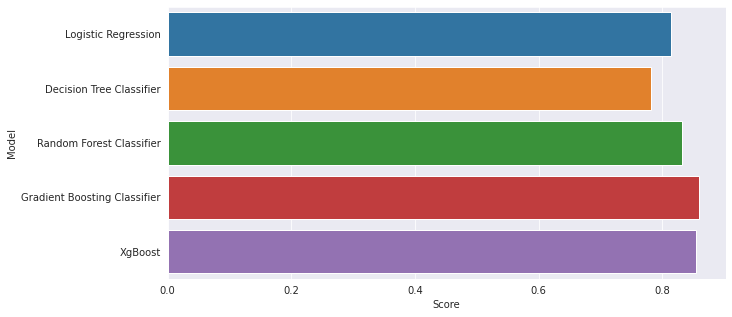

In [43]:
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

In [44]:
xgb_prediction = xgb.predict(test_df)
prediction = pd.DataFrame(xgb_prediction)
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = prediction
submission.to_csv('Submission.csv', index = False)

<a name="acknowledgements"></a>
# <center style="color:#0178BD; font-family:cursive;"> *Acknowledgements*</center>

EDA Inspiration from:

https://www.kaggle.com/code/namanmanchanda/pima-indian-diabetes-eda-and-prediction/notebook

https://www.kaggle.com/code/shubhamksingh/create-beautiful-notebooks-formatting-tutorial/notebook



<a name="the-end"></a>
# <center style="color:#0178BD; font-family:cursive;"> *THE END*</center>